### Installing necessary libraries

In [2]:
# needed libraries to be installed for the project. Uncomment below line to install necessary libraries.

# pip install pandas scikit-learn matplotlib nltk numpy seaborn wordcloud

### Loading Dataset

In [3]:
# pandas library is used for data manipulation and analysis.
# importing pandas library
import pandas as pd

# Here, it is used for reading the csv file IMDB Dataset.csv.

# importing IMDB Dataset.csv and assigning it to dataframe  'df'.
df = pd.read_csv("IMDB Dataset.csv")

# displaying the IMDB dataset.
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Analysis of Dataset

##### Checking for dataset's rows and columns

In [4]:
df.shape

(50000, 2)

##### Checking for null values in the dataset.

In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

##### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


##### Checking for class Imbalance in the dataset.

In [7]:
# counting the number of occurences of each sentiment in the dataset and assigning it to variable "counts".
counts = df['sentiment'].value_counts()

# displaying counts
counts

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

##### Visalizing class imbalance of the dataset

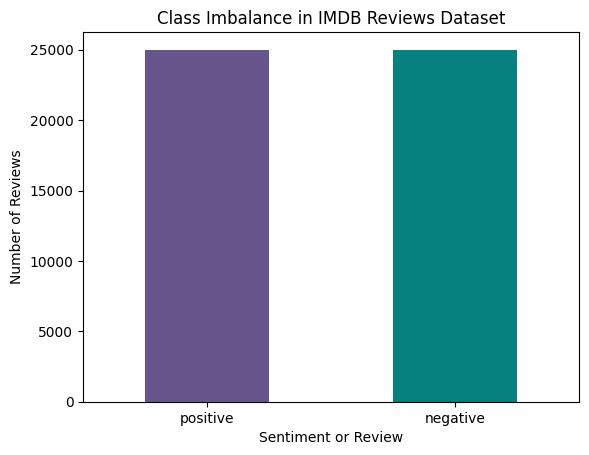

In [8]:
# matplotlib is a data visualization library in Python that is used for representing data in graphical format.
# importing matplotlib library.
import matplotlib.pyplot as plt

# Here, matplotlib is used for visualizing class imbalance of the dataset.

# making bar chart for visualising class imbalance.
counts.plot(kind='bar', color=['#67568c', '#078080'])

# title of the chart.
plt.title('Class Imbalance in IMDB Reviews Dataset')

# labels for x and y axis in the chart.
plt.xlabel('Sentiment or Review')
plt.ylabel('Number of Reviews')

# no rotation on x axis labels.
plt.xticks(rotation=0)

# display the bar chart.
plt.show()

### Text Pre-processing

##### Importing neccesary libraries for the text pre-processing

In [9]:
# re (Regular expression) is a built-in library that provides functions for searching and manipulating strings based on specific patterns.
# importing re module.
import re

# NLTK (Natural Language Toolkit) is a standard library for handling natural language processing (NLP) tasks in Python.
# importing NLTK
import nltk

# stopwords are the common words like is, the, a etc. that carries less meaning.
# importing stopwrods from nltk.corpus.
from nltk.corpus import stopwords

# Lemmatization is the process of converting a word to its base form.
# importing WordNetLemmatizer from nltk.stem. 
from nltk.stem import WordNetLemmatizer

# The functions of re module is used for removing punctuations, special characters and html tags from the reviews in the dataset.
# NLTK is used for text pre-processing task such as tokenization, lemmatization, and stopword removal.

##### Stopwords removal, lemmatization, removing puntuactions, and lowercasing.

In [10]:
# Creating a set of common english stopwords and assigning to variable 'stopWords'.
stopWords = set(stopwords.words('english'))

# 2. Define a set of negation words that are important for sentiment analysis which flips the sentiment of a sentence.
negations = {"not", "no", "never", "none", "don't", "can't", "couldn't", "shouldn't", "won't", "wouldn't", "isn't", "aren't", "wasn't", "weren't", "hasn't", "haven't", "hadn't"}

# Removing negation words from the stopWords set to retain them in the reviews.
stopWords = stopWords - negations

# Initializing the lemmatizer and assigning to variable 'lemmatizer'.
lemmatizer = WordNetLemmatizer()

# creating a list for storing processed reviews.
processed_reviews = []

# function for pre-processing each review in the dataset.
def process_review(review):

    # removing html tags and special characters including punctuations from the review.
    removedHtmlTags = re.sub(r'<.*?>', '', review)
    removedPuntuations = re.sub(r'[^a-zA-Z]', ' ', removedHtmlTags)

    # lowercasing each word in the review.
    lowerCasedreview = removedPuntuations.lower()

    # tokenizating of the review.
    words = lowerCasedreview.split()

    # removing stopwords and lemmatizing each word in the review stored as tokens in words.
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopWords]

    # joining all the words back to a single string after pre-processing.
    processed_review = ' '.join(words)

    return processed_review
 
# creating a new column 'processed_reviews' in the dataframe to stored processed reviews.
df['processed_review'] = df['review'].apply(process_review)

# mapping sentiment labels to numeric values. 0 for negtive and 1 for positive labels.
df['sentiment_score'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# displaying the dataframe.
df

,review,sentiment,processed_review,sentiment_score
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,1
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,0
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...,0
49998,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...,0


### Keyword Visualization in the dataset.

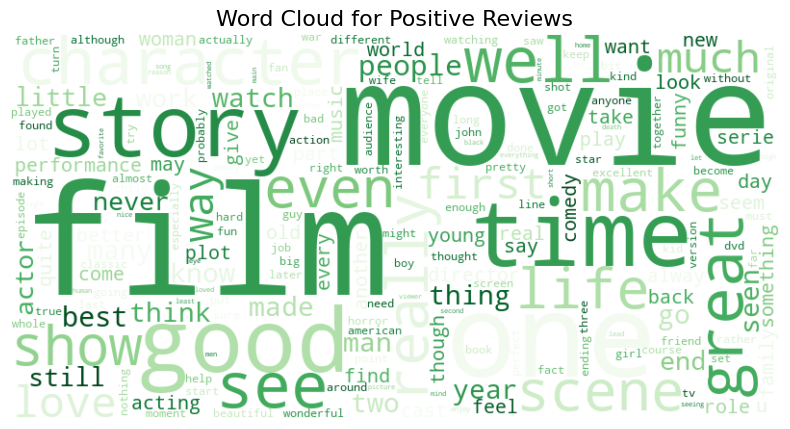

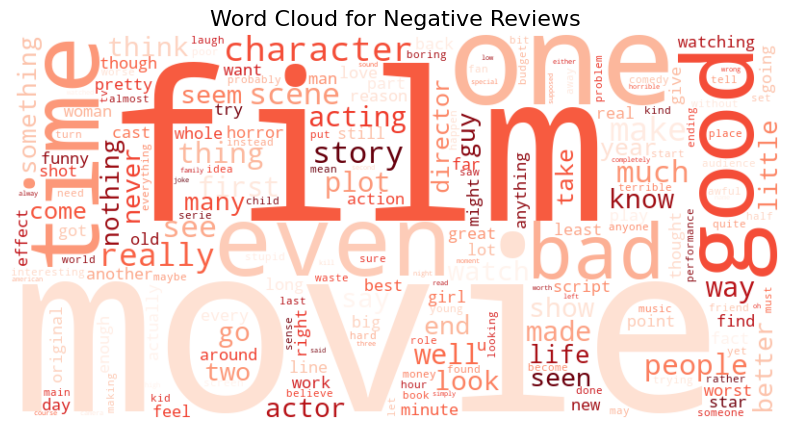

In [11]:
# Word cloud is a data visualization library that shows the important words which occurs frequently.
from wordcloud import WordCloud

# function for creating word cloud for a particular sentiment type in the dataset.
def generate_wordCloud(type, color):
    # joining all the reviews of a particular sentiment type into a single string.
    text = " ".join(review for review in df[df['sentiment'] == type]['processed_review'])

    # generating word cloud
    wordcloud = WordCloud(collocations=False, background_color='white', colormap=color, width=800, height=400).generate(text)
    
    # displaying the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {type.capitalize()} Reviews', fontsize=16)
    plt.show()

# word cloud for positive words in the reviews
generate_wordCloud("positive", "Greens")
# word cloud for negative words in the reviews
generate_wordCloud("negative", "Reds")


### Model Training and Testing

##### Defining features and labels of the dataset.

In [12]:
# defining the features as x and labels as y of the dataset.
x = df['processed_review']
y = df['sentiment_score']

##### Splitting dataset to train and test data and vectorization

In [ ]:
# train_test_split is an utility function used for splitting the dataset into training and testing sets.
# importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# TfidfVectorizer is a feature-extration utility function that converts words into numerical vectors.
# importing TfidfVectorizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting the data into trainingi and testing sets with 20% test size.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# transforming the train and test data using TfidfVectorizer into vectors.
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

##### Training and testing Multinomial Naive Bayes

In [14]:
# Multinomial Naive Bayes is a a probabilistic classification algorithm that models the frequency of words using probability.
# importing MultinomialNB from sklearn.naive_bayes.
from sklearn.naive_bayes import MultinomialNB

# Initializing the Multinomial Naive Bayes model
NBModel = MultinomialNB()
# training the model using the training data.
NBModel.fit(X_train_vectors, y_train)
# testing the model using the test data.
nb_pred = NBModel.predict(X_test_vectors)

##### Training and Testing Linear Support Vector Machine

In [15]:
# Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification tasks.
# importing LinearSVC from sklearn.svm
from sklearn.svm import LinearSVC

# Initializing the Linear SVM model
SVMModel = LinearSVC()
# training the svm model using the training data.
SVMModel.fit(X_train_vectors, y_train)
# testing the svm model using the test data.
svm_pred = SVMModel.predict(X_test_vectors)

##### Importing necessary libraries for Evaluation

In [16]:
# importing necessary metrices for evaluating the model's performance.
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, roc_curve, auc

##### Numerical Evaluation

In [17]:
# calculating and displaying accuracy, and confusion(precision, recall and f1-score) of the model.
print("Model: Naive Bayes \nAccuracy:", accuracy_score(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))

print("---------------------------------------------------------------")
# calculating and displaying accuracy, and confusion(precision, recall and f1-score) of the model.

print("Model: Linear SVC \nAccuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

Model: Naive Bayes 
Accuracy: 0.8554
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

---------------------------------------------------------------
Model: Linear SVC 
Accuracy: 0.8828
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



##### Visual Evaluation

##### 1. Confusion Matrix

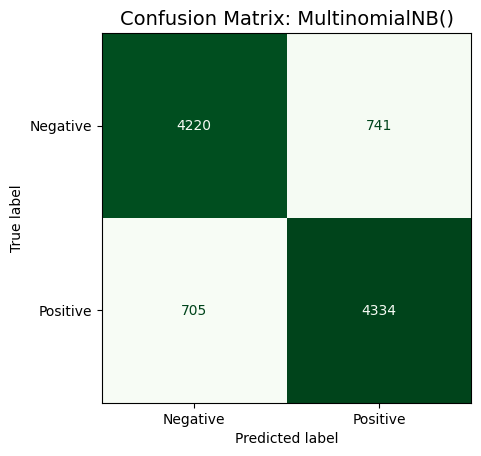

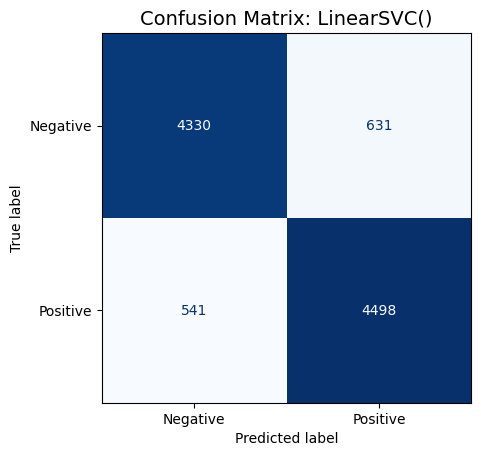

In [18]:
# function for displaying confusion matrix for a give model.
def display_confusion_matrix(model, color_map):
    cmd = ConfusionMatrixDisplay.from_estimator(model, X_test_vectors, y_test, display_labels=['Negative', 'Positive'], cmap=color_map, colorbar=False)
    
    plt.title(f'Confusion Matrix: {model}', fontsize=14)
    plt.show()

# displaying confusion matrix for Multinomial Naive Bayes.
display_confusion_matrix(NBModel, plt.cm.Greens)
# displaing confusion matrix for Linear SVC.
display_confusion_matrix(SVMModel, plt.cm.Blues)

##### 2. ROC Curve

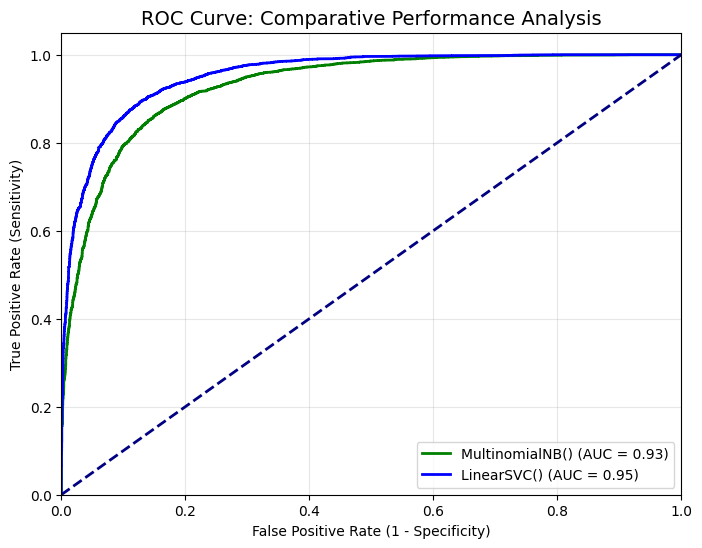

In [19]:
def display_roc_curve(model, color_code):
    if hasattr(model, "decision_function"):
        scores = model.decision_function(X_test_vectors)
    else:
        scores = model.predict_proba(X_test_vectors)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, scores)
    
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color_code, lw=2, label=f'{model} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 6))

display_roc_curve(NBModel, "green")

display_roc_curve(SVMModel, "blue")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve: Comparative Performance Analysis', fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

##### Cross Validating each Models

In [20]:
# Cross-Validation is a evaluation technique used for assessing the performance of the model.
# importing cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score

# numpy is a fundamental python library used for numerical computations.
# importing numpy
import numpy as np

# 10-fold Cross-Validation for Naive Bayes
nb_cv_scores = cross_val_score(NBModel, X_train_vectors, y_train, cv=10)

# 10-fold Cross-Validation for Linear SVC
svc_cv_scores = cross_val_score(SVMModel, X_train_vectors, y_train, cv=10)

# Displaying the Results for each fold of both models.
def display_cvScores(model_name, scores):
    print(f"Cross-Validation for {model_name}:")
    print(f"Scores for each fold: {scores}")
    
    # calculating and displaying mean accuracy of the model.
    print(f"Mean Accuracy: {np.mean(scores):.4f}")
    
    # calulating and displaying standard deviation of the model.
    print(f"Standard Deviation: {np.std(scores):.4f}")

# displaying cross-validation results for both models.
display_cvScores("Naive Bayes", nb_cv_scores)
print("\n")
display_cvScores("Linear SVC", svc_cv_scores)

Cross-Validation for Naive Bayes:
Scores for each fold: [0.85375 0.852   0.85625 0.858   0.85075 0.8565  0.857   0.84575 0.853
 0.86425]
Mean Accuracy: 0.8547
Standard Deviation: 0.0047


Cross-Validation for Linear SVC:
Scores for each fold: [0.887   0.88325 0.88475 0.8825  0.8785  0.8865  0.8795  0.876   0.8735
 0.879  ]
Mean Accuracy: 0.8810
Standard Deviation: 0.0043
